In [31]:
using AvailablePotentialEnergyFramework, Statistics, JLD

In [32]:
using PyPlot, PyCall
tkr = pyimport("matplotlib.ticker")# import FormatStrFormatter

PyObject <module 'matplotlib.ticker' from '/global/common/cori_cle6/software/python/3.6-anaconda-5.2/lib/python3.6/site-packages/matplotlib/ticker.py'>

In [33]:
data_dir = "/global/cscratch1/sd/aramreye/for_postprocessing/CompositeOutputs_50d_9hpa/"

"/global/cscratch1/sd/aramreye/for_postprocessing/CompositeOutputs_50d_9hpa/"

In [34]:
file_list_nomask = ["f5e-4_2km_1000km_control_nomask.jld"
"f5e-4_2km_1000km_homoRad_homoSfc_nomask.jld"
"f5e-4_2km_1000km_homoRad_nomask.jld"
"f5e-4_2km_1000km_homoSfc_nomask.jld"]
file_list_withmask = ["f5e-4_2km_1000km_control_withmask.jld"
"f5e-4_2km_1000km_homoRad_homoSfc_withmask.jld"
"f5e-4_2km_1000km_homoRad_withmask.jld"
"f5e-4_2km_1000km_homoSfc_withmask.jld"]

4-element Array{String,1}:
 "f5e-4_2km_1000km_control_withmask.jld"
 "f5e-4_2km_1000km_homoRad_homoSfc_withmask.jld"
 "f5e-4_2km_1000km_homoRad_withmask.jld"
 "f5e-4_2km_1000km_homoSfc_withmask.jld"

In [35]:
control_withmask_composite =  load(string(data_dir,"f5e-4_2km_1000km_control_withmask.jld"))
control_nomask_composite =  load(string(data_dir,"f5e-4_2km_1000km_control_nomask.jld"))
homoSfc_withmask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoSfc_withmask.jld"))
homoSfc_nomask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoSfc_nomask.jld"))
homoRad_withmask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_withmask.jld"))
homoRad_nomask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_nomask.jld"))
homoAll_withmask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_withmask.jld"))
homoAll_nomask_composite =  load(string(data_dir,"f5e-4_2km_1000km_homoRad_homoSfc_nomask.jld"))

Dict{String,Any} with 17 entries:
  "W"                      => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ;…
  "LHF"                    => Float32[116.459 116.459 … 116.459 116.459; 116.45…
  "V"                      => Float32[0.242547 0.308887 … 0.193084 0.224212; 0.…
  "QRAD"                   => Float32[-1.55049 -1.55049 … -1.55049 -1.55049; -1…
  "PW"                     => Float32[45.0567 45.084 … 45.0809 45.065; 45.0932 …
  "USFC"                   => Float32[-0.653738 -0.655779 … -0.635857 -0.614637…
  "PSFC"                   => Float32[1001.12 1001.12 … 1001.1 1001.11; 1001.12…
  "PP"                     => Float32[-146.798 -145.883 … -148.725 -147.741; -1…
  "QV"                     => Float32[17.2495 17.275 … 17.2497 17.2529; 17.2574…
  "Prec"                   => Float32[4.73424 4.85908 … 4.13808 4.18086; 4.4151…
  "convec_heating_anomaly" => Float32[-8.39102f-7 -2.25523f-7 … -8.96879f-7 3.7…
  "VSFC"                   => Float32[0.242765 0.309274 … 0.193009 0.224435

In [36]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=8)

In [37]:
radiusbins = 1000:2000:512000;
length(radiusbins)

256

In [38]:
function get_tangential_and_radial_speed(composite)
    tangential = similar(composite["V"])
    radial = similar(composite["V"]);
    for index in CartesianIndices(tangential)
        center = (256,256)
        index_of_point = (index[1],index[2])
        tangential[index],radial[index] = AvailablePotentialEnergyFramework.velocity_cartesian_to_polar(composite["U"][index],composite["V"][index],index_of_point,center)
    end
    return tangential,radial
end

function get_azimuthal_average(array :: Array{T,3},radiusbins) where T
    azimuthalaverage = zeros(eltype(array),length(radiusbins) - 1,size(array,3));
    for rindex in 1:(length(radiusbins) - 1)
        azimuthalaverage[rindex,:] .= AvailablePotentialEnergyFramework.averageallindistance((radiusbins[rindex],radiusbins[rindex+1]),array,(256,256),2000.0)   
    end
    return azimuthalaverage
end

function get_azimuthal_average(array :: Array{T,2},radiusbins) where T
    azimuthalaverage = zeros(eltype(array),length(radiusbins) - 1);
    for rindex in 1:(length(radiusbins) - 1)
        azimuthalaverage[rindex] = AvailablePotentialEnergyFramework.averageallindistance((radiusbins[rindex],radiusbins[rindex+1]),array,(256,256),2000.0)   
    end
    return azimuthalaverage
end

get_azimuthal_average (generic function with 2 methods)

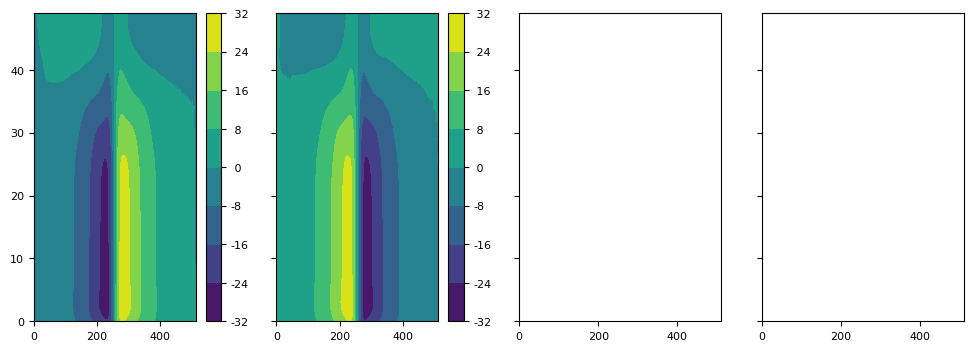

PyObject <matplotlib.colorbar.Colorbar object at 0x2aad4bdc8b38>

In [22]:


fig, ax = plt.subplots(1,4,figsize=(12,4),sharex=true,sharey=true)

p1 = ax[1].contourf(permutedims(control_nomask_composite["V"][:,256,1:50]))
cb1 = fig.colorbar(p1, ax = ax[1],format=tkr.FormatStrFormatter("% d"))

p2 = ax[2].contourf(permutedims(control_nomask_composite["U"][256,:,1:50]))
cb2 = fig.colorbar(p2
, ax = ax[2],format=tkr.FormatStrFormatter("% d"))

In [9]:
tangential_control_nomask, radial_control_nomask = get_azimuthal_average(get_tangential_and_radial_speed(control_nomask_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(control_nomask_composite)[2],radiusbins)

(Float32[0.48100471 0.49767867 … 4.5141933f-5 0.00015279504; 0.84095 0.8669074 … 0.0002709036 5.6644825f-5; … ; -0.6106586 -0.66733193 … -3.7906375f-5 -3.8269052f-5; -0.6375457 -0.69620275 … -7.700061f-6 -7.736491f-6], Float32[-0.03432505 -0.0053928345 … 0.0022887136 0.0007105278; -0.076925896 -0.025751838 … 0.0018858573 0.0012850756; … ; 0.111436434 0.089188896 … 0.0002508194 0.00025493273; 0.114361666 0.09128631 … 0.00018678351 0.0002341201])

In [39]:
dia_heating_control_nomask = 86400/g*get_azimuthal_average(control_nomask_composite["convec_heating_anomaly"].*mean(control_nomask_composite["TABS"],dims=(1,2)),radiusbins)
dia_heating_homoRad_nomask = 86400/g*get_azimuthal_average(homoRad_nomask_composite["convec_heating_anomaly"].*mean(homoRad_nomask_composite["TABS"],dims=(1,2)),radiusbins)
dia_heating_homoSfc_nomask = 86400/g*get_azimuthal_average(homoSfc_nomask_composite["convec_heating_anomaly"].*mean(homoSfc_nomask_composite["TABS"],dims=(1,2)),radiusbins)
dia_heating_homoAll_nomask = 86400/g*get_azimuthal_average(homoAll_nomask_composite["convec_heating_anomaly"].*mean(homoAll_nomask_composite["TABS"],dims=(1,2)),radiusbins)

tpert_control_nomask = get_azimuthal_average(control_nomask_composite["TABS"] .- mean(control_nomask_composite["TABS"],dims=(1,2)),radiusbins)
tpert_homoRad_nomask = get_azimuthal_average(homoRad_nomask_composite["TABS"] .- mean(homoRad_nomask_composite["TABS"],dims=(1,2)),radiusbins)
tpert_homoSfc_nomask = get_azimuthal_average(homoSfc_nomask_composite["TABS"] .- mean(homoSfc_nomask_composite["TABS"],dims=(1,2)),radiusbins)
tpert_homoAll_nomask = get_azimuthal_average(homoAll_nomask_composite["TABS"] .- mean(homoAll_nomask_composite["TABS"],dims=(1,2)),radiusbins)

surfu_control_nomask = hypot.(control_nomask_composite["USFC"],control_nomask_composite["VSFC"])
surfu_homoRad_nomask = hypot.(homoRad_nomask_composite["USFC"],homoRad_nomask_composite["VSFC"])
surfu_homoSfc_nomask = hypot.(homoSfc_nomask_composite["USFC"],homoSfc_nomask_composite["VSFC"])
surfu_homoAll_nomask = hypot.(homoAll_nomask_composite["USFC"],homoAll_nomask_composite["VSFC"])

averagespeed_control_nomask = get_azimuthal_average(surfu_control_nomask,radiusbins)
averagespeed_homoRad_nomask = get_azimuthal_average(surfu_homoRad_nomask,radiusbins)
averagespeed_homoSfc_nomask = get_azimuthal_average(surfu_homoSfc_nomask,radiusbins)
averagespeed_homoAll_nomask = get_azimuthal_average(surfu_homoAll_nomask,radiusbins)

surfpres_control_nomask = control_nomask_composite["PSFC"]
surfpres_homoRad_nomask = homoRad_nomask_composite["PSFC"]
surfpres_homoSfc_nomask = homoSfc_nomask_composite["PSFC"]
surfpres_homoAll_nomask = homoAll_nomask_composite["PSFC"]

averagepres_control_nomask = get_azimuthal_average(surfpres_control_nomask,radiusbins)
averagepres_homoRad_nomask = get_azimuthal_average(surfpres_homoRad_nomask,radiusbins)
averagepres_homoSfc_nomask = get_azimuthal_average(surfpres_homoSfc_nomask,radiusbins)
averagepres_homoAll_nomask = get_azimuthal_average(surfpres_homoAll_nomask,radiusbins)




tangential_control_nomask, radial_control_nomask = get_azimuthal_average(get_tangential_and_radial_speed(control_nomask_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(control_nomask_composite)[2],radiusbins)
tangential_homoRad_nomask, radial_homoRad_nomask = get_azimuthal_average(get_tangential_and_radial_speed(homoRad_nomask_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(homoRad_nomask_composite)[2],radiusbins)
tangential_homoSfc_nomask, radial_homoSfc_nomask = get_azimuthal_average(get_tangential_and_radial_speed(homoSfc_nomask_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(homoSfc_nomask_composite)[2],radiusbins)
tangential_homoAll_nomask, radial_homoAll_nomask = get_azimuthal_average(get_tangential_and_radial_speed(homoAll_nomask_composite)[1],radiusbins),get_azimuthal_average(get_tangential_and_radial_speed(homoAll_nomask_composite)[2],radiusbins)


(Float32[3.100896 3.2098413 … -0.0002572974 -0.0004078468; 5.4846206 5.678674 … -0.00044852574 -0.0006321456; … ; -0.6251856 -0.6717904 … 1.507487f-5 4.4412955f-6; -0.65158653 -0.70044804 … -2.4467718f-7 6.378296f-6], Float32[-0.23137175 -0.06991136 … 0.0024041997 0.0020942823; -0.42986667 -0.13401598 … 0.0030501194 0.0027514566; … ; 0.090653606 0.06939047 … 0.0003327271 0.00026372448; 0.09332116 0.07044938 … 0.00014647821 0.000117827185])

In [49]:
z_grd = [50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1178.57142857143 1385.71428571429 1671.42857142857 2035.71428571429 2478.57142857143 3000 3600 4200 4800 5400 6000 6600 7200 7800 8400 9000 9600 10200 10800 11400 12000 12600 13200 13800 14400 15000 15600 16200 16800 17400 18000 18600 19200 19800 20400 21000 21600 22200 22800 23400 24000 24600 25200 25800 26400 27000 27600 28200 28800 29400 30000 30600 31200 31800 32400 33000 33600 34200 34800];
x = 1e-3collect(range(0,step=2000,length=255))
y = x
z_iter = 1:56;
x_iter = 1:100

1:100

In [12]:
size(tangentia_control)

(512, 512, 80)

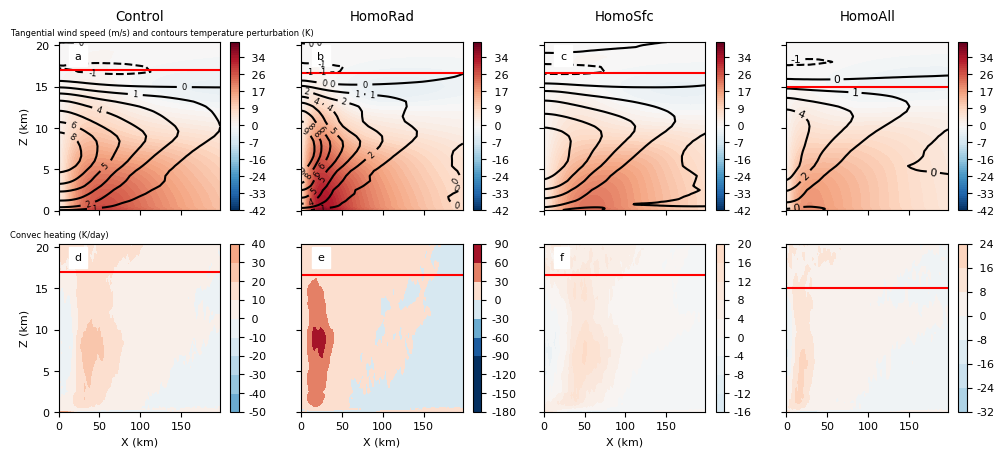

PyObject <function tight_layout at 0x2aab0692a400>

In [54]:
#cmap = "PiYG"
#cmap = "PuOr_r"
cmap = "RdBu_r"
#cmap = "viridis"
labelfontsize = 6
clabfmt = "%d"
ccolor = "k"

levels_tpert = range(-maximum(abs.(tpert_control_nomask[x_iter,z_iter])),length=15,stop=maximum(abs.(tpert_control_nomask[x_iter,z_iter])))#[[1:5;8:15]]
levels_tangential = range(-42.0,length=80,stop=42)
levels_heating = range(-90,length=180,stop=90)
fig, ax = plt.subplots(2,4,figsize=(12,4.8),sharex=true,sharey=true)
p2 = ax[2,1].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_control_nomask[x_iter,z_iter]),cmap=cmap,vmin=-90,vmax=90)
p3 = ax[1,1].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_control_nomask[x_iter,z_iter]),cmap=cmap,levels=levels_tangential)
p31 = ax[1,1].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_control_nomask[x_iter,z_iter]),levels=levels_tpert,colors=ccolor,linewidth=1)
ax[1,1].axhline(y=15.6, color="r", linestyle="-")
ax[2,1].axhline(y=15.6, color="r", linestyle="-")
cb2 = fig.colorbar(p2, ax = ax[2,1],format=tkr.FormatStrFormatter("% d"))
cb3 = fig.colorbar(p3, ax = ax[1,1],format=tkr.FormatStrFormatter("% d"))
contlab3 = ax[1,1].clabel(p31, inline=1, fontsize=labelfontsize,fmt=clabfmt)

###################################
p5 = ax[2,2].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoRad_nomask[x_iter,z_iter]),cmap=cmap,vmin=-90,vmax=90)
p6 = ax[1,2].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoRad_nomask[x_iter,z_iter]),cmap=cmap,levels_tangential)
p61 = ax[1,2].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_homoRad_nomask[x_iter,z_iter]),levels=levels_tpert,colors=ccolor,linewidth=1)
contlab6 = ax[1,2].clabel(p61, inline=1, fontsize=labelfontsize,fmt=clabfmt)
ax[1,2].axhline(y=16.6, color="r", linestyle="-")
ax[2,2].axhline(y=16.6, color="r", linestyle="-")
cb5 = fig.colorbar(p5, ax = ax[2,2],format=tkr.FormatStrFormatter("% d"))
cb6 = fig.colorbar(p6, ax = ax[1,2],format=tkr.FormatStrFormatter("% d"))
###################################

p7 = ax[2,3].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoSfc_nomask[x_iter,z_iter]),cmap=cmap,vmin=-90,vmax=90)
p8 = ax[1,3].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoSfc_nomask[x_iter,z_iter]),cmap=cmap,levels_tangential)
p81 = ax[1,3].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_homoSfc_nomask[x_iter,z_iter]),levels=levels_tpert,colors=ccolor,linewidth=1)
contlab6 = ax[1,3].clabel(p61, inline=1, fontsize=labelfontsize,fmt=clabfmt)
ax[1,3].axhline(y=15.0, color="r", linestyle="-")
ax[2,3].axhline(y=15.0, color="r", linestyle="-")
cb7 = fig.colorbar(p7, ax = ax[2,3],format=tkr.FormatStrFormatter("% d"))
cb8 = fig.colorbar(p8, ax = ax[1,3],format=tkr.FormatStrFormatter("% d"))
####################################

p9 = ax[2,4].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoAll_nomask[x_iter,z_iter]),cmap=cmap,vmin=-90,vmax=90)
p10 = ax[1,4].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoAll_nomask[x_iter,z_iter]),cmap=cmap,levels_tangential)
p101 = ax[1,4].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_homoAll_nomask[x_iter,z_iter]),levels=levels_tpert,colors=ccolor,linewidth=1)
contlab7 = ax[1,4].clabel(p101, inline=1, fontsize=1.3labelfontsize,fmt=clabfmt)
ax[1,4].axhline(y=14, color="r", linestyle="-")
ax[2,4].axhline(y=14, color="r", linestyle="-")
cb9 = fig.colorbar(p9, ax = ax[2,4],format=tkr.FormatStrFormatter("% d"))
cb10 = fig.colorbar(p10, ax = ax[1,4],format=tkr.FormatStrFormatter("% d"))

ax[2,1].text(-0.3, 1.04, string("Convec heating (K/day)"), transform=ax[2,1].transAxes, size=6)
ax[1,1].text(-0.3, 1.04, string("Tangential wind speed (m/s) and contours temperature perturbation (K)"), transform=ax[1,1].transAxes, size=6)

ax[1,1].annotate("a", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[1,2].annotate("b", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[1,3].annotate("c", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,1].annotate("d", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,2].annotate("e", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,3].annotate("f", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")


ax[1,1].set_ylabel("Z (km)")
ax[2,1].set_ylabel("Z (km)")
#ax[3,1].set_ylabel("Z (km)")
ax[2,1].set_xlabel("X (km)")
ax[2,2].set_xlabel("X (km)")
ax[2,3].set_xlabel("X (km)")
ax[1,1].set_title("Control",y=1.08)
ax[1,2].set_title("HomoRad",y=1.08)
ax[1,3].set_title("HomoSfc",y=1.08)
ax[1,4].set_title("HomoAll",y=1.08)
#fig.suptitle("Treshold $treshold hPa")
plt.tight_layout

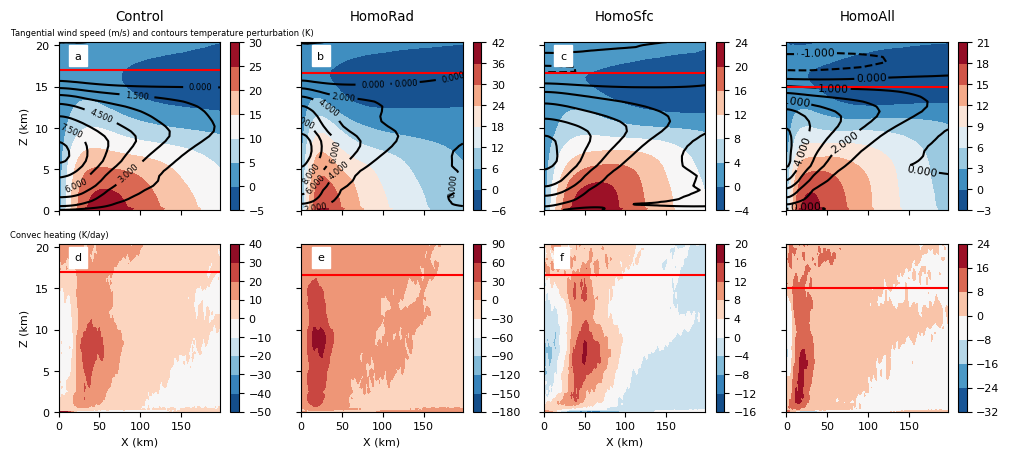

PyObject <function tight_layout at 0x2aab0692a400>

In [51]:
#cmap = "PiYG"
#cmap = "PuOr_r"
cmap = "RdBu_r"
#cmap = "viridis"
labelfontsize = 6
clabfmt = "%d"
ccolor = "k"

levels_tpert = range(-maximum(abs.(tpert_control_nomask[x_iter,z_iter])),length=15,stop=maximum(abs.(tpert_control_nomask[x_iter,z_iter])))#[[1:5;8:15]]
levels_tangential = range(-10.0,length=11,stop=10)
fig, ax = plt.subplots(2,4,figsize=(12,4.8),sharex=true,sharey=true)
p2 = ax[2,1].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_control_nomask[x_iter,z_iter]),cmap=cmap)
p3 = ax[1,1].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_control_nomask[x_iter,z_iter]),cmap=cmap)
p31 = ax[1,1].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_control_nomask[x_iter,z_iter]),colors=ccolor,linewidth=1)
ax[1,1].axhline(y=17, color="r", linestyle="-")
ax[2,1].axhline(y=17, color="r", linestyle="-")
cb2 = fig.colorbar(p2, ax = ax[2,1])
cb3 = fig.colorbar(p3, ax = ax[1,1])
contlab3 = ax[1,1].clabel(p31, inline=1, fontsize=labelfontsize)

###################################
p5 = ax[2,2].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoRad_nomask[x_iter,z_iter]),cmap=cmap)
p6 = ax[1,2].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoRad_nomask[x_iter,z_iter]),cmap=cmap)
p61 = ax[1,2].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_homoRad_nomask[x_iter,z_iter]),colors=ccolor,linewidth=1)
contlab6 = ax[1,2].clabel(p61, inline=1, fontsize=labelfontsize)
ax[1,2].axhline(y=16.6, color="r", linestyle="-")
ax[2,2].axhline(y=16.6, color="r", linestyle="-")
cb5 = fig.colorbar(p5, ax = ax[2,2])
cb6 = fig.colorbar(p6, ax = ax[1,2])
###################################

p7 = ax[2,3].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoSfc_nomask[x_iter,z_iter]),cmap=cmap)
p8 = ax[1,3].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoSfc_nomask[x_iter,z_iter]),cmap=cmap)
p81 = ax[1,3].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_homoSfc_nomask[x_iter,z_iter]),colors=ccolor,linewidth=1)
contlab6 = ax[1,3].clabel(p61, inline=1, fontsize=labelfontsize)
ax[1,3].axhline(y=16.6, color="r", linestyle="-")
ax[2,3].axhline(y=16.6, color="r", linestyle="-")
cb7 = fig.colorbar(p7, ax = ax[2,3])
cb8 = fig.colorbar(p8, ax = ax[1,3])
####################################

p9 = ax[2,4].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(dia_heating_homoAll_nomask[x_iter,z_iter]),cmap=cmap)
p10 = ax[1,4].contourf(x[x_iter],1e-3*z_grd[z_iter],permutedims(tangential_homoAll_nomask[x_iter,z_iter]),cmap=cmap)
p101 = ax[1,4].contour(x[x_iter],1e-3*z_grd[z_iter],permutedims(tpert_homoAll_nomask[x_iter,z_iter]),colors=ccolor,linewidth=1)
contlab7 = ax[1,4].clabel(p101, inline=1, fontsize=1.3labelfontsize)
ax[1,4].axhline(y=15, color="r", linestyle="-")
ax[2,4].axhline(y=15, color="r", linestyle="-")
cb9 = fig.colorbar(p9, ax = ax[2,4])
cb10 = fig.colorbar(p10, ax = ax[1,4])

ax[2,1].text(-0.3, 1.04, string("Convec heating (K/day)"), transform=ax[2,1].transAxes, size=6)
ax[1,1].text(-0.3, 1.04, string("Tangential wind speed (m/s) and contours temperature perturbation (K)"), transform=ax[1,1].transAxes, size=6)

ax[1,1].annotate("a", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[1,2].annotate("b", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[1,3].annotate("c", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,1].annotate("d", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,2].annotate("e", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,3].annotate("f", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")


ax[1,1].set_ylabel("Z (km)")
ax[2,1].set_ylabel("Z (km)")
#ax[3,1].set_ylabel("Z (km)")
ax[2,1].set_xlabel("X (km)")
ax[2,2].set_xlabel("X (km)")
ax[2,3].set_xlabel("X (km)")
ax[1,1].set_title("Control",y=1.08)
ax[1,2].set_title("HomoRad",y=1.08)
ax[1,3].set_title("HomoSfc",y=1.08)
ax[1,4].set_title("HomoAll",y=1.08)
#fig.suptitle("Treshold $treshold hPa")
plt.tight_layout

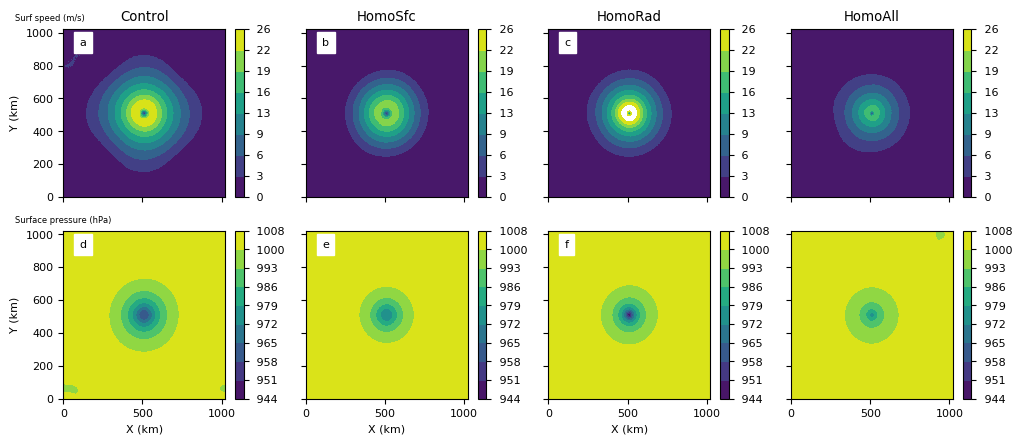

PyObject Text(0.5, 1.0, 'HomoAll')

In [46]:
fig, ax = plt.subplots(2,4,sharex=true,sharey=true,figsize=(12,4.8))
x_domain = 1e-3collect(range(0,step=2000,length=512))
p1 = ax[1,1].contourf(x_domain,x_domain,surfu_control_nomask,levels=range(0,length=9,stop=26))
cb1 = fig.colorbar(p1, ax = ax[1,1],format=tkr.FormatStrFormatter("% d"))
p2 = ax[2,1].contourf(x_domain,x_domain,surfpres_control_nomask,levels=range(944,length=10,stop=1008))
cb2 = fig.colorbar(p2, ax = ax[2,1],format=tkr.FormatStrFormatter("% d"))
#cb2[:ax][:set_title]("This is a title")
#p3 = ax[3,1][:contourf](x,x,pw_control[:,:,end])
#cb3 = fig[:colorbar](p3, ax = ax[3,1])
############################
p4 = ax[1,2].contourf(x_domain,x_domain,surfu_homoSfc_nomask,levels=range(0,length=9,stop=26))
cb4 = fig.colorbar(p4, ax = ax[1,2],format=tkr.FormatStrFormatter("% d"))
p5 = ax[2,2].contourf(x_domain,x_domain,surfpres_homoSfc_nomask,levels=range(944,length=10,stop=1008))
cb5 = fig.colorbar(p5, ax = ax[2,2],format=tkr.FormatStrFormatter("% d"))
#p6 = ax[3,2][:contourf](x,x,pw_homoRad[:,:,end])
#cb6 = fig[:colorbar](p6, ax = ax[3,2])
############
p4 = ax[1,3].contourf(x_domain,x_domain,surfu_homoRad_nomask,levels=range(0,length=9,stop=26))
cb4 = fig.colorbar(p4, ax = ax[1,3],format=tkr.FormatStrFormatter("% d"))
p5 = ax[2,3].contourf(x_domain,x_domain,surfpres_homoRad_nomask,levels=range(944,length=10,stop=1008))
cb5 = fig.colorbar(p5, ax = ax[2,3],format=tkr.FormatStrFormatter("% d"))
#p6 = ax[3,2][:contourf](x,x,pw_homoRad[:,:,end])
#cb6 = fig[:colorbar](p6, ax = ax[3,2])
############
p6 = ax[1,4].contourf(x_domain,x_domain,surfu_homoAll_nomask,levels=range(0,length=9,stop=26))
cb6 = fig.colorbar(p6, ax = ax[1,4],format=tkr.FormatStrFormatter("% d"))
p7 = ax[2,4].contourf(x_domain,x_domain,surfpres_homoAll_nomask,levels=range(944,length=10,stop=1008))
cb7 = fig.colorbar(p7, ax = ax[2,4],format=tkr.FormatStrFormatter("% 4d"))
#p9 = ax[3,3][:contourf](x,x,pw_homoRad_homoSfc[:,:,end])
#cb9 = fig[:colorbar](p9, ax = ax[3,3])
ax[1,1].text(-0.3, 1.05, string("Surf speed (m/s)"), transform=ax[1,1].transAxes, 
            size=6)
ax[2,1].text(-0.3, 1.05, string("Surface pressure (hPa)"), transform=ax[2,1].transAxes, 
            size=6)
ax[1,1].annotate("a", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[1,2].annotate("b", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[1,3].annotate("c", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,1].annotate("d", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,2].annotate("e", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2,3].annotate("f", xy=(0.1, 0.9), xycoords="axes fraction",backgroundcolor="white")
#ax[3,1][:text](-0.2, 1.03, "Precip water (kg/m^2)", transform=ax[3,1][:transAxes], 
#            size=10)
ax[1,1].set_ylabel("Y (km)")
ax[2,1].set_ylabel("Y (km)")
ax[2,1].set_xlabel("X (km)")
ax[2,2].set_xlabel("X (km)")
ax[2,3].set_xlabel("X (km)")
ax[1,1].set_title("Control")
ax[1,2].set_title("HomoSfc")
ax[1,3].set_title("HomoRad")
ax[1,4].set_title("HomoAll")

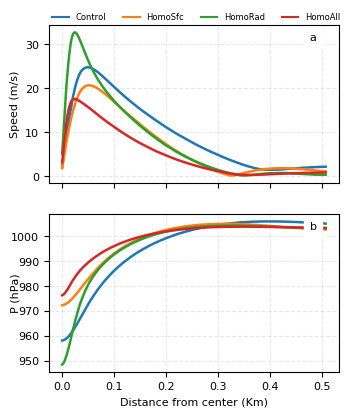

In [47]:
fig, ax = plt.subplots(2,1,sharex=true,figsize=(3.74,4.5))
p1 = ax[1].plot(1e-3x,averagespeed_control_nomask,label="Control")
p2 = ax[1].plot(1e-3x,averagespeed_homoSfc_nomask,label="HomoSfc")
p3 = ax[1].plot(1e-3x,averagespeed_homoRad_nomask,label="HomoRad")
p4 = ax[1].plot(1e-3x,averagespeed_homoAll_nomask,label="HomoAll")
ax[1].set_ylabel(string("Speed (m/s)"))
#######################
p1 = ax[2].plot(1e-3x,averagepres_control_nomask,label="Control")
p2 = ax[2].plot(1e-3x,averagepres_homoSfc_nomask,label="HomoSfc")
p3 = ax[2].plot(1e-3x,averagepres_homoRad_nomask,label="HomoRad")
p4 = ax[2].plot(1e-3x,averagepres_homoAll_nomask,label="HomoAll")
ax[2].set_ylabel(string("P (hPa)"))

# #######################

ax[2].set_xlabel(string("Distance from center (Km)"))
ax[1].yaxis.set_label_coords(-0.1,0.5)
ax[2].yaxis.set_label_coords(-0.1,0.5)
ax[1].annotate("a", xy=(0.9, 0.9), xycoords="axes fraction",backgroundcolor="white")
ax[2].annotate("b", xy=(0.9, 0.9), xycoords="axes fraction",backgroundcolor="white")
plt.tight_layout
ax[1].legend(loc = (-0.0, 1), ncol=4 ,frameon=false,fontsize=6)
lw = 1.8
[ln.set_linewidth(lw) for i in 1:length(ax) for ln in ax[i].lines]
ax[1].grid(b=true,which="major",color="xkcd:gray", linestyle="--",alpha=0.2)
ax[2].grid(b=true,which="major",color="xkcd:gray", linestyle="--",alpha=0.2)